# Chapter 11: How to make predictions with a multiple regression model

In [ ]:
import pandas as pd
import seaborn as sns

## The Cars dataset

In [ ]:
carsData = pd.read_csv('cars.csv')

In [ ]:
carsData.head()

In [ ]:
carsData.info()

# How to create a simple regression model

In [ ]:
sns.heatmap(data=carsData.corr()[['price']].sort_values('price', ascending=False), 
            annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')

In [ ]:
sns.pairplot(carsData)

In [ ]:
sns.scatterplot(data=carsData, x= 'price',y='enginesize')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
carsData.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    carsData[['enginesize']], carsData[['price']],
    test_size=0.20, random_state=400)

model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test,y_test)

In [ ]:
x_train.shape

In [ ]:
y_predicted = model.predict(x_test)
model.score(y_predicted, y_test)

In [ ]:
# create DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

# combine the test data and the predicted data into a frame
final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
final[['enginesize','price','predictedPrice']].head()

## How to plot the residuals of a simple regression

In [ ]:
final['residual'] = final.price - final.predictedPrice
final.head(2)

In [ ]:
g = sns.relplot(data=final, x='enginesize', y='residual', kind='scatter')
for ax in g.axes.flat:
    ax.axhline(0, ls='--')

In [ ]:
sns.kdeplot(data=final, x='residual')

In [ ]:
# error bars
final['residual_bin'] = pd.qcut(final["residual"],q=7)

In [ ]:
final.groupby(['residual_bin']).residual.mean()

In [ ]:
final.residual_bin.value_counts(normalize=True)

In [ ]:
sns.catplot(data = final , kind='box', y="residual",x="residual_bin" )

In [ ]:
final["enginesize_bin"] = pd.qcut(final.enginesize, q=3)
sns.catplot(data = final , kind='box', y="enginesize_bin",x="residual" , orient='h')

# How to create a multiple regression model

In [ ]:
carsData["high_price"] = (carsData["price"] > 27500).astype(int)
carsData.high_price.value_counts()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    carsData[['enginesize','curbweight','high_price']], carsData[['price']], 
    test_size=0.20, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)
model.score(x_test, y_test)
# one variable r-squared = 0.7063964117029844

In [ ]:
model.score(x_train, y_train)

In [ ]:
y_predicted = model.predict(x_test)

## How to prepare and plot the multiple regression

In [ ]:
# create the DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

# combine the test data and the predicted data into a DataFrame
final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
final.head()[['enginesize','curbweight','price','predictedPrice']]

In [ ]:
model.coef_

## How to plot the residuals of a multiple regression

In [ ]:
final['residual'] = final.price - final.predictedPrice
final.head()

In [ ]:
final.price.hist(bins=10)

In [ ]:
sns.kdeplot(data=final, x='residual')

## How to identify categorical variables

In [ ]:
carsData.nunique()

## How to review categorical variables

### Dichotomous variables

In [ ]:
carsData.enginelocation.value_counts()

In [ ]:
carsData.fueltype.value_counts()

In [ ]:
carsData.aspiration.value_counts()

In [ ]:
carsData.doornumber.value_counts()

### Nominal variables

In [ ]:
carsData.fuelsystem.value_counts()

In [ ]:
carsData.carbody.value_counts()

In [ ]:
carsData.drivewheel.value_counts()

In [ ]:
carsData.enginetype.value_counts()

In [ ]:
carsData.cylindernumber.value_counts()

## How to create dummy variables

In [ ]:
catColumns = ['aspiration','doornumber','carbody','drivewheel']
dummies = pd.get_dummies(carsData[catColumns])
dummies.info()

In [ ]:
dummies.describe()

## Cluster Work

In [ ]:
carsDummies = carsData.drop(columns=catColumns)
carsDummies = carsDummies.join(dummies)
carsDummies.head(5)

In [ ]:
carsDummies.describe().T

In [ ]:

collist = list({col if str(carsDummies[col].dtypes) == 'object' else None for col in carsDummies.columns})
collist.remove(None)
carsDummiesCluster = carsDummies.drop(columns= collist)

In [ ]:
{d for d in carsDummiesCluster.dtypes}

In [ ]:
carsDummiesCluster.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_cars = pca.fit_transform(carsDummiesCluster)

#### PCA on Cars data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='red')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(pca_cars[:, 0], pca_cars[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(pca_cars[:, 0], pca_cars[:, 1],
            c=carsDummiesCluster["cluster"], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
pca_cars

### Clustering Cars Data
#### For clusters, train on the ENTIRE dataset WITHOUT THE TARGET

In [ ]:
sklearn.cluster?

In [ ]:
xCols = list(carsDummiesCluster.columns)
xCols.remove("price")
xCols

In [ ]:
preCols =  xCols.copy()

In [ ]:
preCols.remove("cluster")

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
kmeans = KMeans(3,random_state=111)
carsDummiesCluster["cluster"] = kmeans.fit_predict(carsDummiesCluster[preCols])

In [129]:
kmeans = KMeans(5,random_state=111)
carsDummiesCluster["cluster5"] = kmeans.fit_predict(carsDummiesCluster[preCols])

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


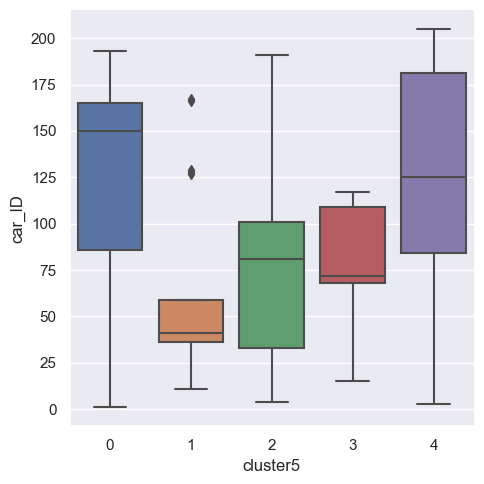

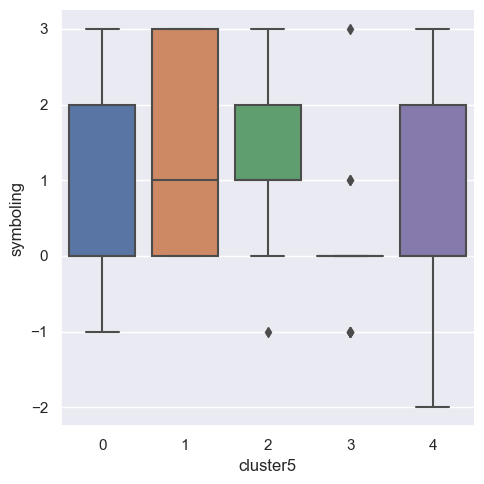

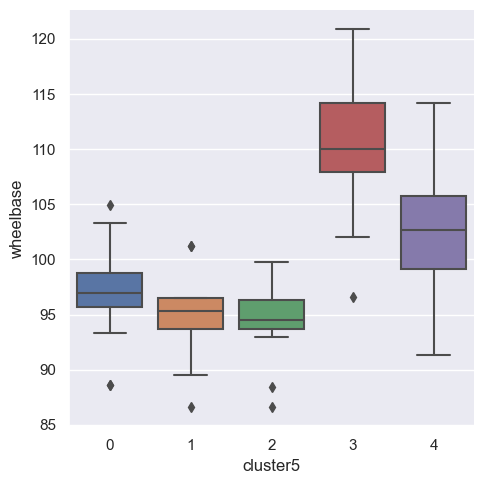

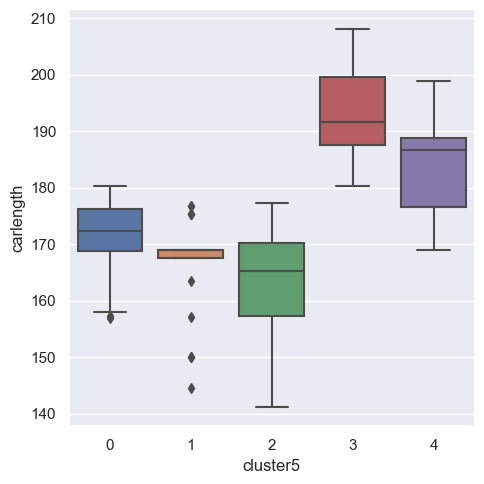

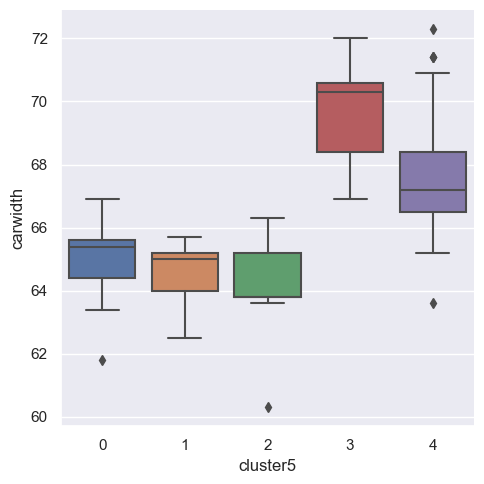

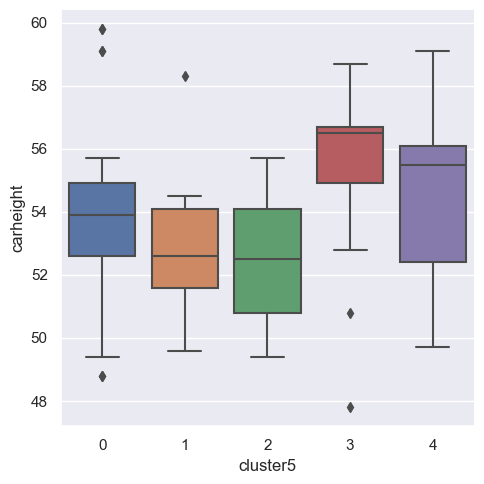

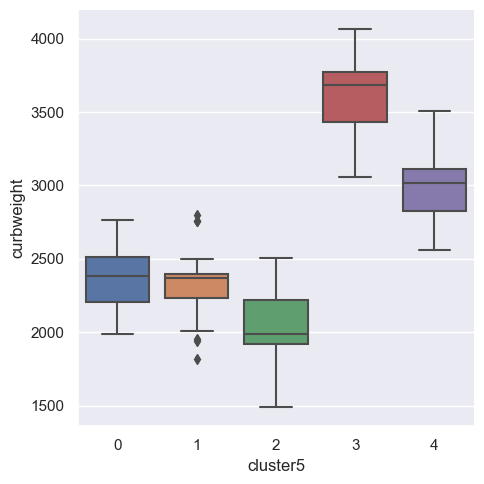

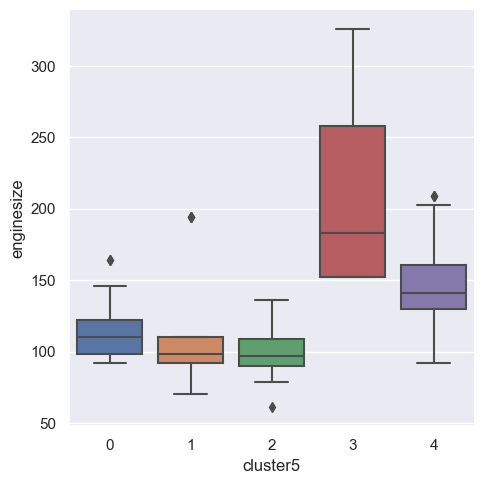

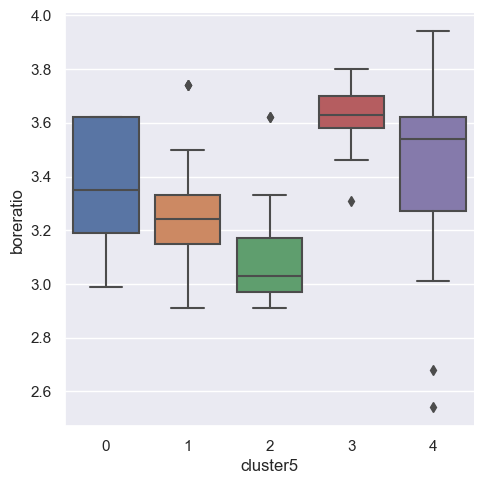

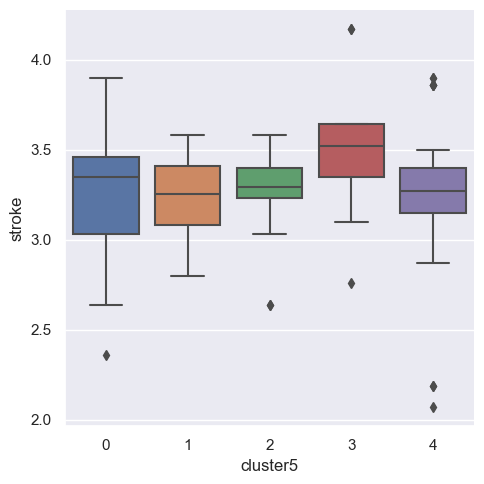

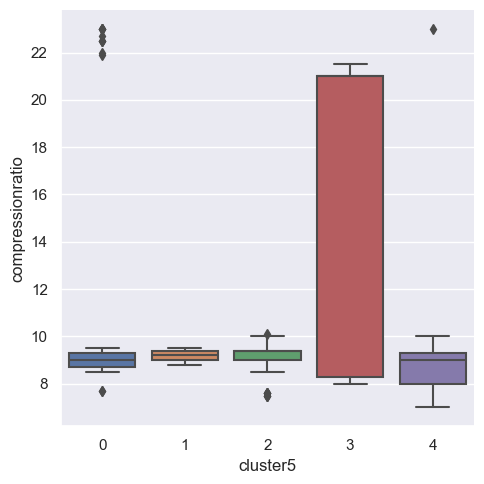

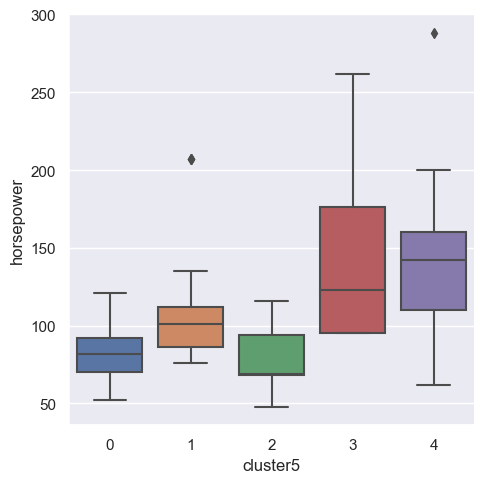

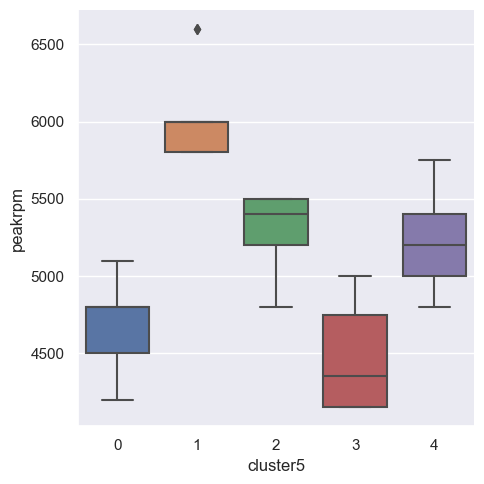

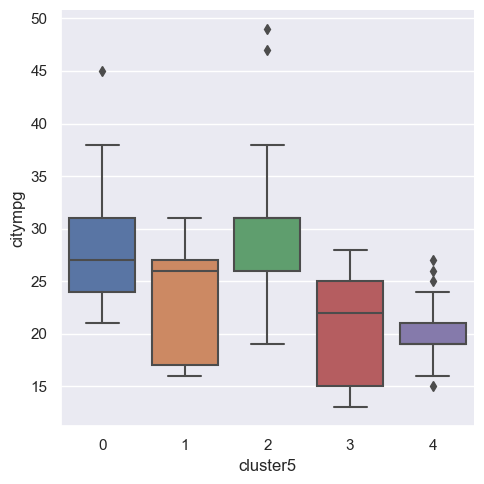

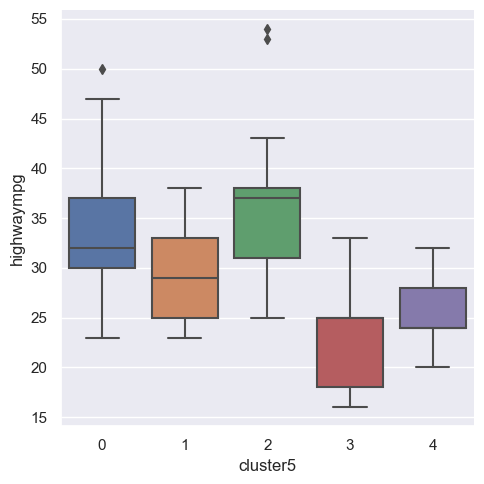

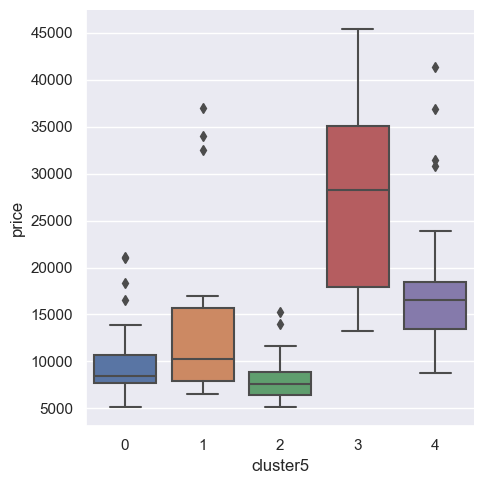

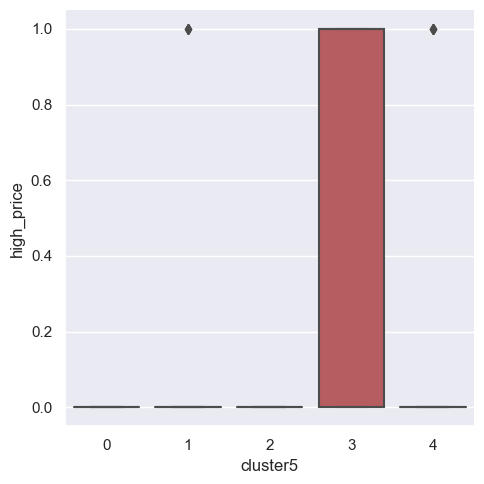

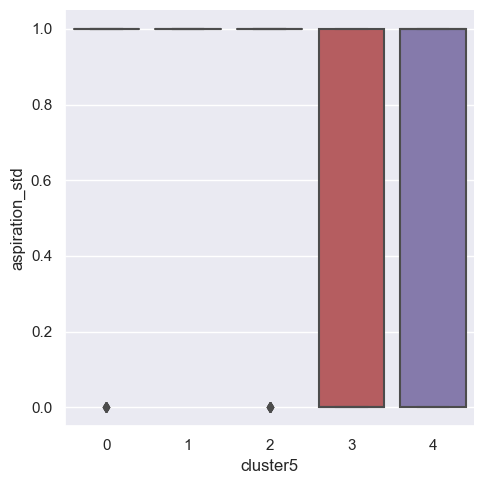

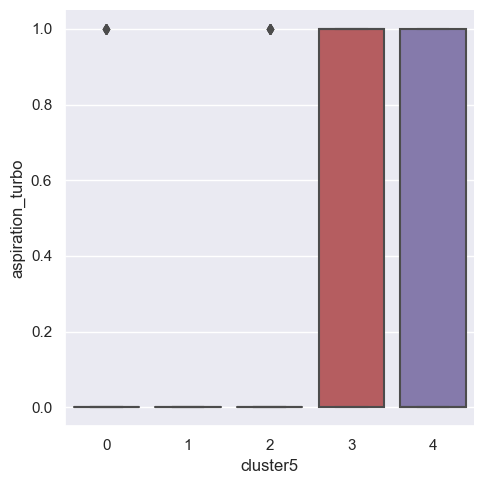

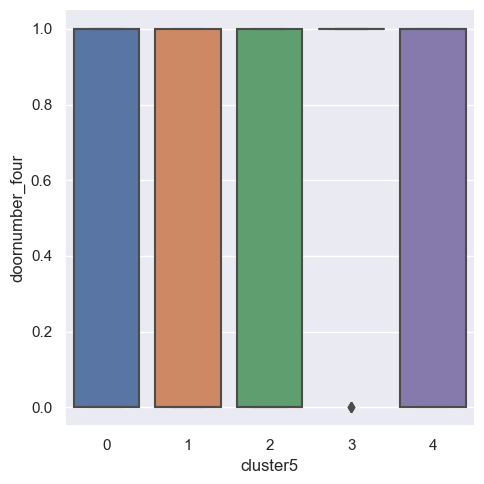

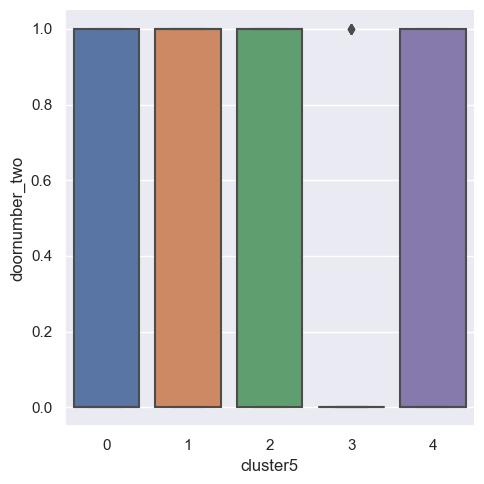

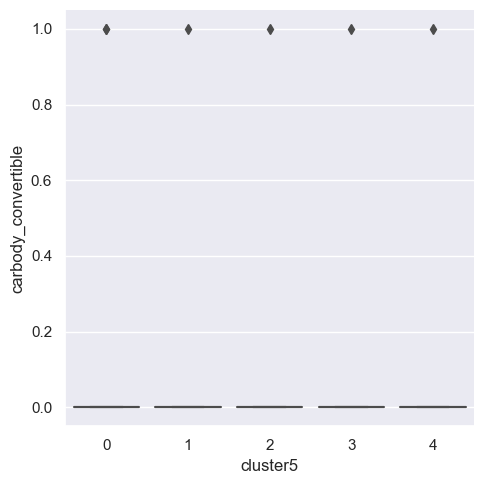

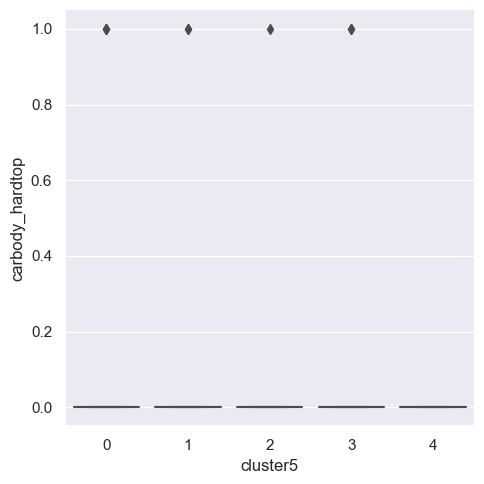

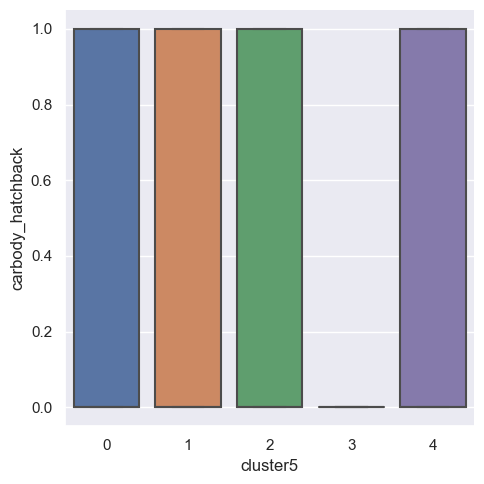

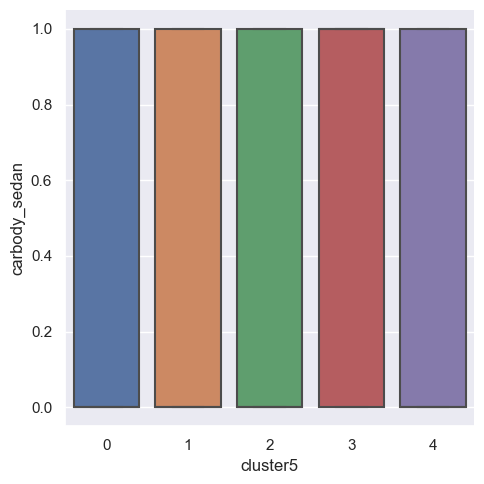

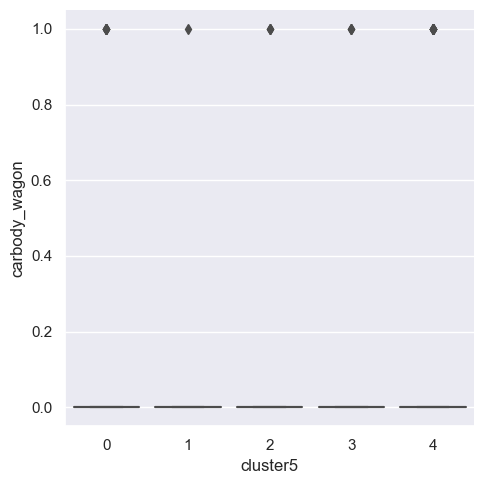

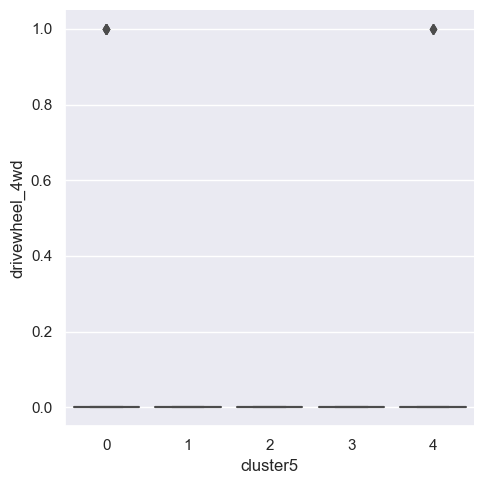

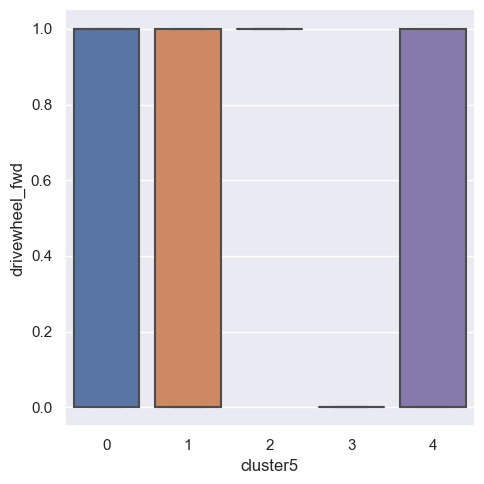

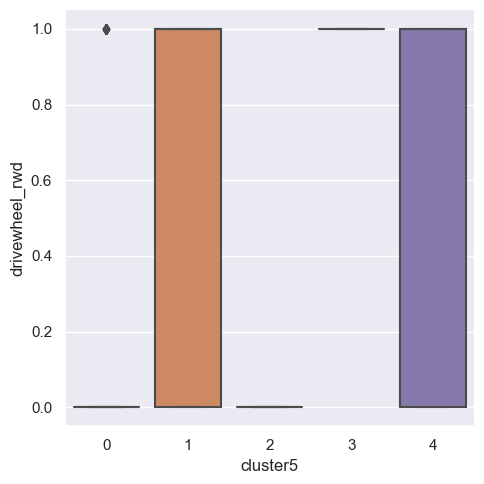

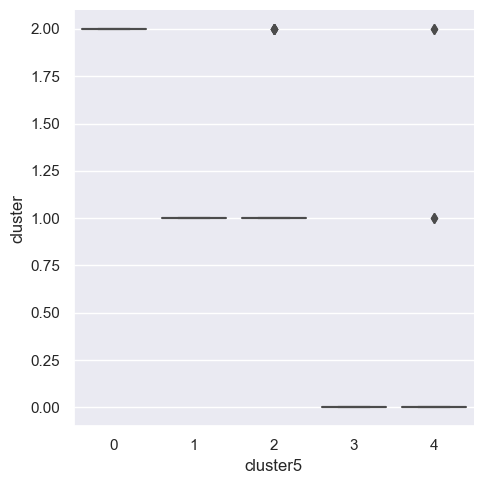

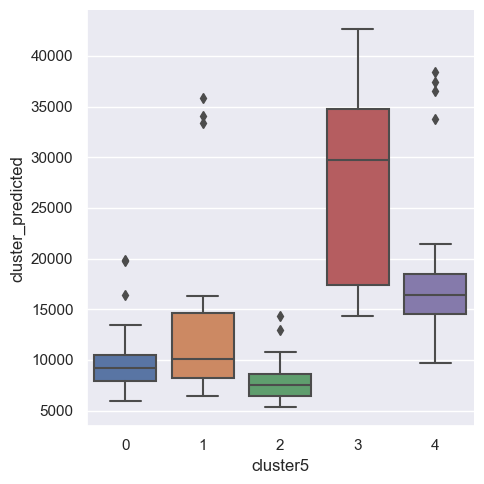

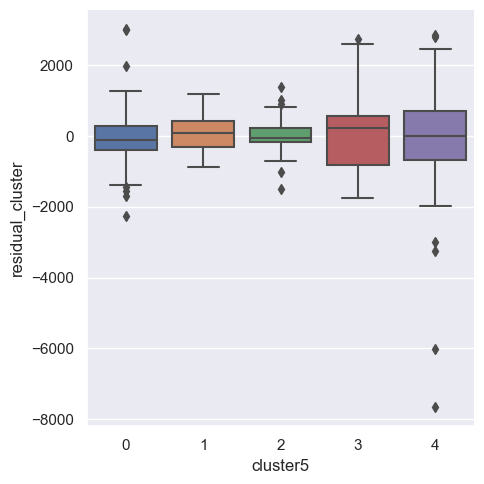

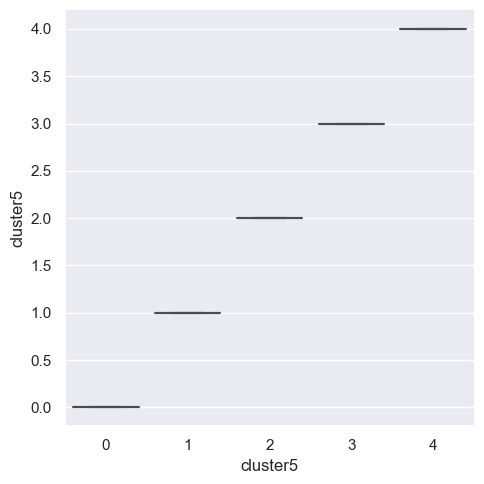

In [130]:
for col in carsDummiesCluster.columns:
    sns.catplot(data = carsDummiesCluster , kind='box', y=col,x="cluster5" , orient='v')

In [ ]:
carsDummies.peakrpm.hist(bins=20)

In [ ]:
numCols = ['wheelbase','carlength','carwidth','carheight','curbweight',
           'enginesize','boreratio','stroke','compressionratio','horsepower',
           'peakrpm','citympg','highwaympg']
carsDummies[numCols].describe().T

## How to rescale the data and check the correlations

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
carsDummies[numCols] = scaler.fit_transform(carsDummies[numCols])
carsDummies[numCols].describe().T

In [ ]:
carsDummies.corr()[['price']].sort_values(by='price', ascending=False)
# carsDummies.drop(carsDummies["high_price"],inplace=True)


In [ ]:
carsDummies["big_engine"] = (carsData["enginesize"] > 150).astype(int)

In [ ]:
noK = xCols.copy()
noK.remove("cluster")
noK

In [100]:
xCols

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'high_price',
 'aspiration_std',
 'aspiration_turbo',
 'doornumber_four',
 'doornumber_two',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'cluster']

In [117]:
# noK = xCols.copy()
# noK.remove("cluster")
KcarsTrain, KcarsTest = train_test_split(carsDummiesCluster, test_size=0.2, 
    random_state=20)
from sklearn.ensemble import RandomForestRegressor
rg_model = RandomForestRegressor()
rg_model.fit(KcarsTrain[noK],KcarsTrain["price"])
rg_model.score(KcarsTest[noK], KcarsTest['price'])

0.8680310192564828

In [123]:
KcarsTrain, KcarsTest = train_test_split(carsDummiesCluster, test_size=0.2, 
    random_state=20)
from sklearn.ensemble import RandomForestRegressor
rg_model2 = RandomForestRegressor()
rg_model2.fit(KcarsTrain[xCols],KcarsTrain["price"])
rg_model2.score(KcarsTest[xCols], KcarsTest['price'])


0.8694933938465172

In [137]:
k5col5 = xCols.copy()
k5col5.remove("cluster")
k5col5.append("cluster5")

In [146]:
KcarsTrain, KcarsTest = train_test_split(carsDummiesCluster, test_size=0.2, 
    random_state=20)
from sklearn.ensemble import RandomForestRegressor
rg_model2 = RandomForestRegressor()
rg_model2.fit(KcarsTrain[k5col5],KcarsTrain["price"])
rg_model2.score(KcarsTest[k5col5], KcarsTest['price'])


0.8726758459071334

In [148]:
carsDummiesCluster["cluster_predicted"]= rg_model2.predict(carsDummiesCluster[k5col5])

In [149]:
carsDummiesCluster["residual_cluster"] = carsDummiesCluster["price"] - carsDummiesCluster["cluster_predicted"]

In [135]:
carsDummiesCluster[["aspiration_turbo","cluster5"]].value_counts()

aspiration_turbo  cluster5
0                 0           52
                  2           47
                  4           40
                  1           21
1                 4           17
                  3            9
0                 3            8
1                 2            6
                  0            5
dtype: int64

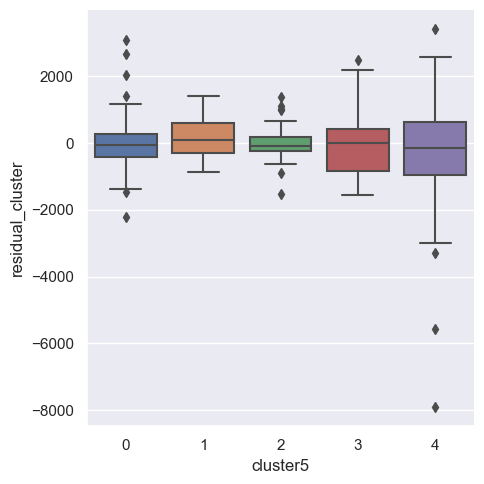

In [150]:
sns.catplot(data = carsDummiesCluster , kind='box', y="residual_cluster",x="cluster5" , orient='v')

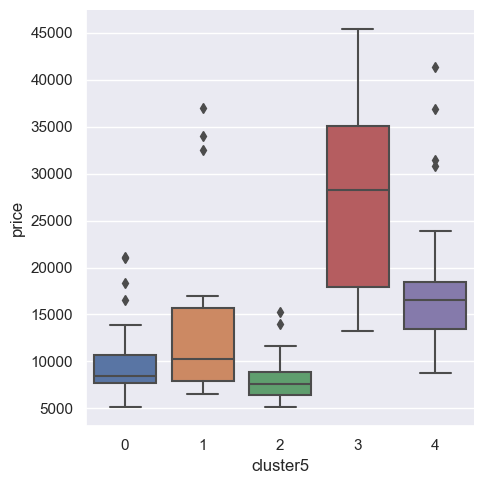

In [136]:
sns.catplot(data = carsDummiesCluster , kind='box', y="price",x="cluster5" , orient='v')

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test.to_numpy(), y_pred_test)

In [108]:
carsDummiesCluster

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,cluster
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,1,0,0,0,0,0,0,1,2
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,1,0,0,0,0,0,0,1,2
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,0,0,1,0,0,0,0,1,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,1,0,0,1,0,1
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,1,0,0,0,1,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,1,0,0,0,1,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,1,0,0,0,1,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,1,0,0,0,1,0


## How to create a multiple regression that includes dummy variables

In [ ]:
carsTrain, carsTest = train_test_split(carsDummies, test_size=0.2, 
    random_state=20)

In [ ]:
model = LinearRegression()
xCols = ['enginesize','horsepower','carwidth',
         'drivewheel_fwd','drivewheel_rwd','highwaympg',"big_engine"]
model.fit(carsTrain[xCols], carsTrain['price'])

model.score(carsTest[xCols], carsTest['price'])
# two var - 0.7581072748679534
# xCols   = 0.7523820020019687
#numCols = 0.8021646959031423

In [ ]:
y_predicted = model.predict(carsTest[numCols])

In [ ]:
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

final = predicted.join([carsTest[xCols].reset_index(drop=True),
                        carsTest['price'].reset_index(drop=True)])

final[['enginesize','horsepower','carwidth','drivewheel_rwd',
       'highwaympg','price','predictedPrice']].head()

## How to select the independent variables

In [ ]:
# use Matplotlib to set the size of the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))

# create the heatmap
sns.heatmap(carsTrain.corr()[['enginesize','curbweight','horsepower','carwidth',
                              'drivewheel_rwd','highwaympg','citympg','boreratio',
                              'price']].sort_values(by='price', ascending=False), 
            cmap='Blues', annot=True)

In [ ]:
numCols

## How to test different combinations of variables

### An initial model that's fitted to eight independent variables

In [ ]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth', 'carlength',
         'drivewheel_rwd','highwaympg','citympg']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

In [ ]:
model.score(carsTrain[xCols], carsTrain['price'])

### The initial model without the citympg column

In [ ]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth','carlength',
         'drivewheel_rwd','highwaympg']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

In [ ]:
model.score(carsTrain[xCols], carsTrain['price'])

### A model that's fitted to all the numeric and dummy variables

In [ ]:
model = LinearRegression()
xCols = carsTrain.corr().drop(columns=['price']).columns.tolist()
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

In [ ]:
model.score(carsTrain[xCols], carsTrain['price'])

## How to use SciKit learn to select the variables

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [ ]:
carsTrain, carsTest = train_test_split(carsDummies.drop(
    columns=['CarName','fueltype','enginelocation','cylindernumber',
             'fuelsystem','enginetype']), test_size=0.2, random_state=20)

In [ ]:
carsTrain.shape

In [ ]:
fs = SelectKBest(score_func=mutual_info_regression, k=20)
fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])

In [ ]:
x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
x_test_fs = fs.transform(carsTest.drop(columns=['price']))

In [ ]:
type(x_test_fs)

In [ ]:
x_test_fs

In [ ]:
model = LinearRegression()
model.fit(x_train_fs, carsTrain['price'])
model.score(x_test_fs, carsTest['price'])

In [ ]:
model.score(x_train_fs, carsTrain['price'])

In [ ]:
df1 = pd.DataFrame(carsTrain.drop(columns=['price']).columns, columns=['feature'])
df1

In [ ]:
df2 = pd.DataFrame(fs.scores_, columns=['importance'])
importance = df1.join(df2)
importance.sort_values('importance', ascending=False)

In [ ]:
fs.scores_

In [ ]:
model.coef_

In [ ]:
model.intercept_

## How to select the right number of variables

In [ ]:
model = LinearRegression()
testScores = []
trainScores = []

for i in range(1, len(carsTrain.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])

    x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
    x_test_fs = fs.transform(carsTest.drop(columns=['price']))

    model.fit(x_train_fs, carsTrain['price'])
    
    testScore = model.score(x_test_fs, carsTest['price'])
    trainScore = model.score(x_train_fs, carsTrain['price'])
    testScores.append(testScore)
    trainScores.append(trainScore)
    
df = pd.DataFrame(data={'testScores':testScores, 'trainScores':trainScores})
df.reset_index(inplace=True)
df.rename(columns={'index':'numFeatures'}, inplace=True)
df.numFeatures = df.numFeatures + 1


In [ ]:
df['perf_gap'] = df['trainScores'] - df['testScores']
g = df.plot(x='numFeatures', y=['testScores','trainScores','perf_gap'], grid = True)

In [ ]:
# Or, if you only want to plot the gap, you could do it like this...
df['gap'] = (df['trainScores'] - df['testScores'])/df['trainScores']
df.plot(x='numFeatures', y=['gap'], grid = True)